In [38]:
#1. paste defaults % 3 - _ext auto inline
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [39]:
#2. import libraries - main_maloy_vision*
import torch
import fastai
from fastai.vision import *
import os

In [40]:
#3. path \ untar \ ls \ create 2folders(for csv), 4folders(img\train\valid\test)
#main path
path = Path('D:\\python\\Courses\\fast.ai\\projects')
#what name our project
try:
    os.mkdir(path/'exam_3_cool-or-not')
except:
    pass

#insert it again
path = Path('D:\\python\\Courses\\fast.ai\\projects\\exam_3_cool-or-not')
#create folders (classes)
try:
    os.mkdir(path/'cool')
except:
    pass
try:
    os.mkdir(path/'ugly')
except:
    pass
path.ls()

[WindowsPath('D:/python/Courses/fast.ai/projects/exam_3_cool-or-not/cool'),
 WindowsPath('D:/python/Courses/fast.ai/projects/exam_3_cool-or-not/cool_urls.csv'),
 WindowsPath('D:/python/Courses/fast.ai/projects/exam_3_cool-or-not/ugly'),
 WindowsPath('D:/python/Courses/fast.ai/projects/exam_3_cool-or-not/ugly_urls.csv')]

In [41]:
#4. path to needed files
path_cool = path/'cool'
path_ugly = path/'ugly'

In [ ]:
#5. copy .txt > .csv &&& .csv > files 
folder = 'cool'
file = 'cool_urls.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=2000)

In [ ]:
folder = 'ugly'
file = 'ugly_urls.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=2000)

In [42]:
#6. verify images
classes = ['cool', 'ugly']
for c in classes:
    verify_images(path/c, delete=True, max_size=2000)

In [44]:
#7. data Image from folder
#.    path        # main path folder
#.    train='.'   
#.    valid_pct
#.    seed
#.    ds_tfms     # transformations
#.    size        
#.    num_workers 
#.    normalize   # (image) 

data = ImageDataBunch.from_folder(path,
                                 train='.',
                                 valid_pct=0.2,
                                 seed=42,
                                 ds_tfms=get_transforms(),
                                 size=224,
                                 num_workers=4).normalize(imagenet_stats)

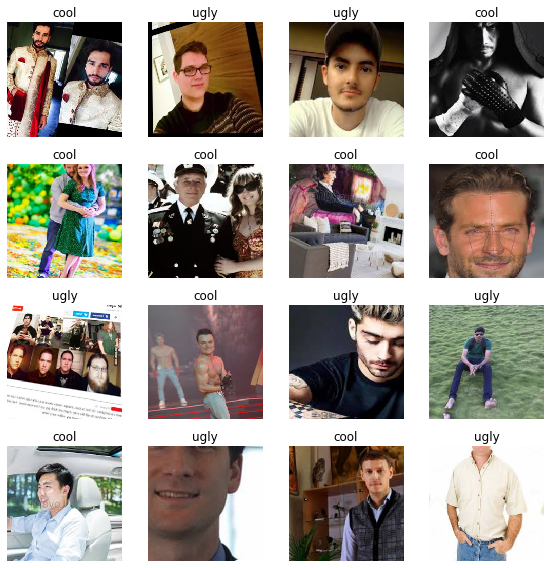

In [46]:
#8. show_batch
data.show_batch(rows=4, figsize=(8,8))

In [47]:
#9. learn - cnn \ data \ arch \ metrics=error_rate
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [48]:
#10. learn.fit_1 \ save
learn.fit_one_cycle(4)
learn.save('stage-1')

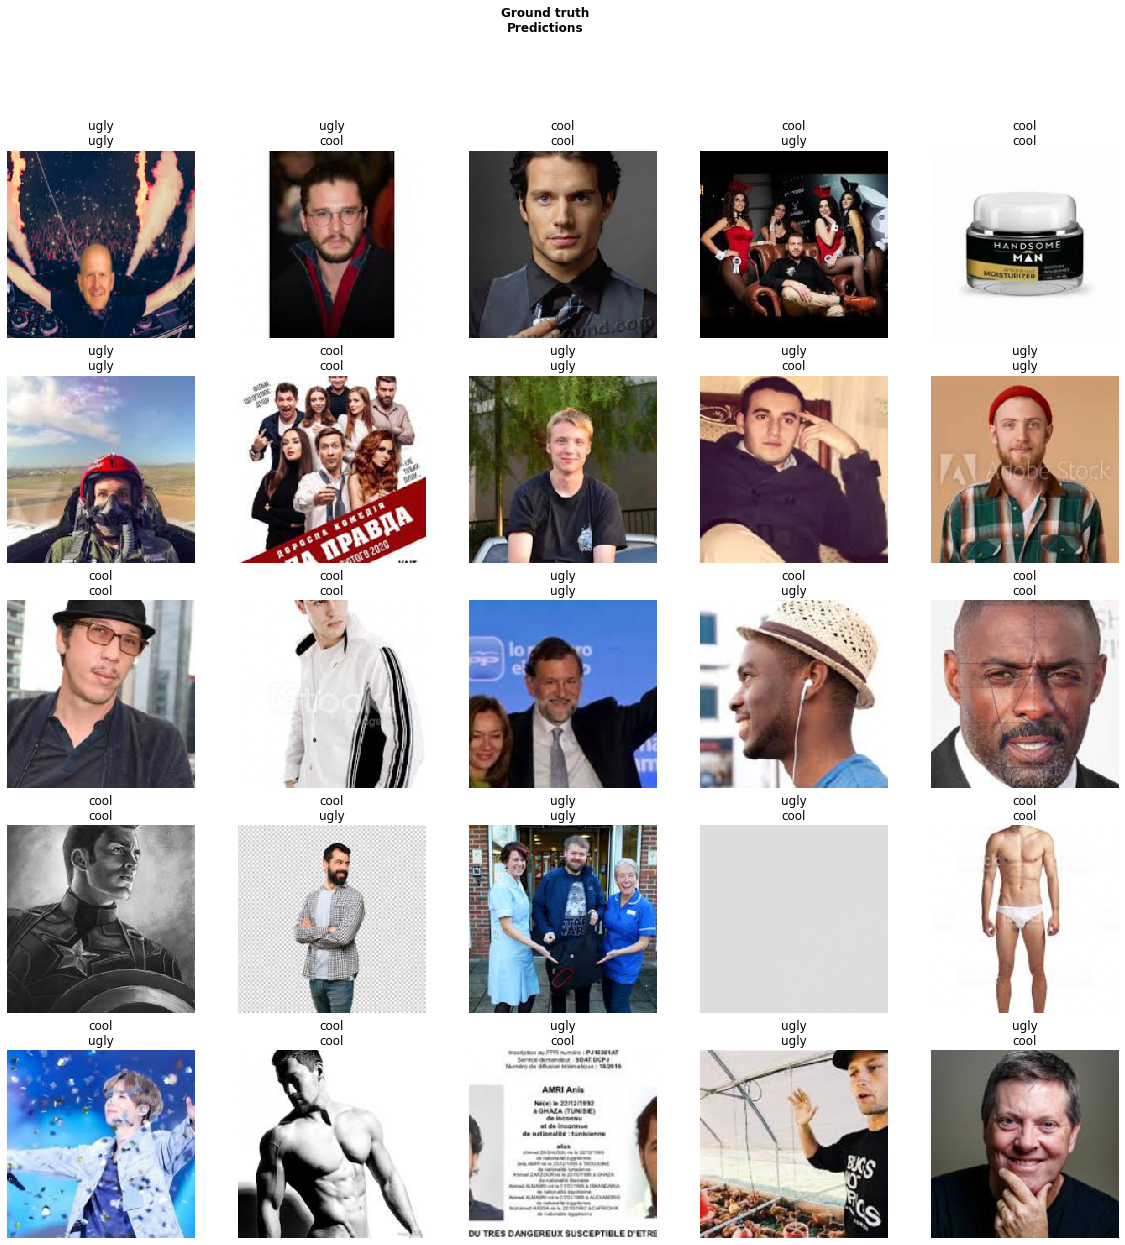

In [49]:
learn.show_results()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


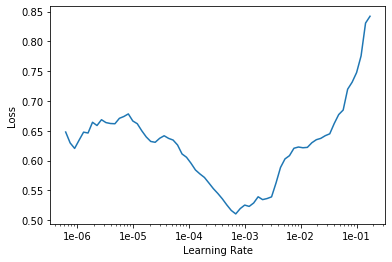

In [50]:
#12. unfreeze fit_1 lr plot
learn.unfreeze()
learn.fit_one_cycle(1)
learn.lr_find()
learn.recorder.plot()

In [51]:
#13. fit lr
learn.fit_one_cycle(4, max_lr=slice(1e-5, 5e-4))

In [52]:
learn.save('stage-2')

In [53]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 5e-4))

In [54]:
learn.load('stage-2');

In [55]:
learn.export()

# check

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import torch
import fastai
from fastai.vision import *
import os
path = Path('D:\\python\\PyProjects\\fast.ai\\projects\\exam_3_cool-or-not')
data = ImageDataBunch.from_folder(path,
                                 train='.',
                                 valid_pct=0.2,
                                 seed=42,
                                 ds_tfms=get_transforms(),
                                 size=224,
                                 num_workers=4).normalize(imagenet_stats)
learn = load_learner(path)

cool 98%


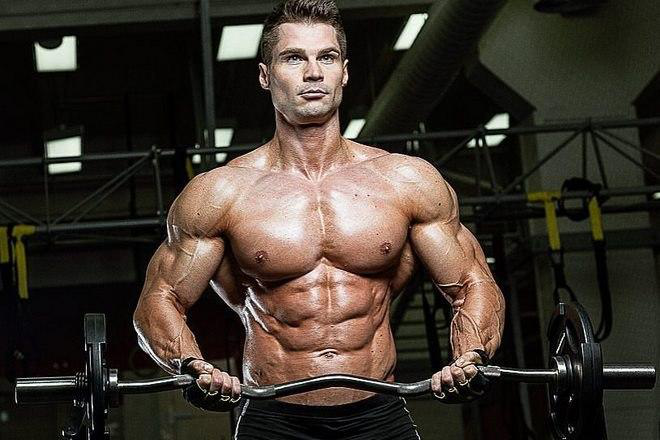

In [56]:
img = open_image(path/'check'/'x1.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
num = int(str(pred_idx)[7:-1])
proc = str(outputs[pred_idx])[9:11]+'%'
print(data.classes[num], proc)
img

ugly 72%


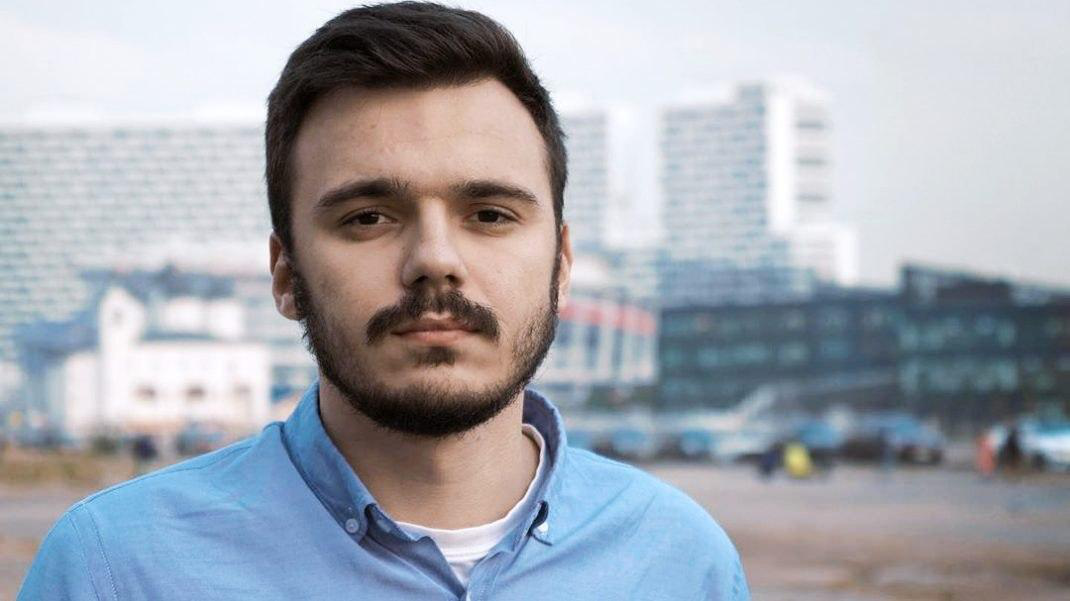

In [57]:
img = open_image(path/'check'/'ч16.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
num = int(str(pred_idx)[7:-1])
proc = str(outputs[pred_idx])[9:11]+'%'
print(data.classes[num], proc)
img

ugly 93%


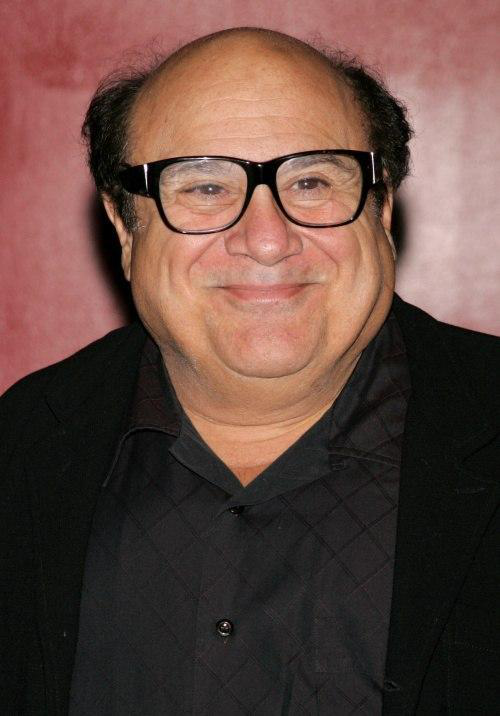

In [58]:
img = open_image(path/'check'/'x4.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
num = int(str(pred_idx)[7:-1])
proc = str(outputs[pred_idx])[9:11]+'%'
print(data.classes[num], proc)
img